In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df = df.sort_values(by=['ID','Date'])
df['Year'], df['Month-date'] = zip(*df['Date'].apply(lambda x: (x[:4], x[5:])))
df = df[df['Month-date'] != '02-29']
df.head()

,ID,Date,Element,Data_Value,Year,Month-date
55067,USC00200032,2005-01-01,TMIN,-28,2005,01-01
55102,USC00200032,2005-01-01,TMAX,67,2005,01-01
112671,USC00200032,2005-01-02,TMAX,122,2005,01-02
112708,USC00200032,2005-01-02,TMIN,-6,2005,01-02
104159,USC00200032,2005-01-03,TMIN,11,2005,01-03


In [46]:
min05 = df[(df['Element'] == 'TMIN') & (df['Year'] != '2015')].groupby('Month-date').aggregate({'Data_Value':np.min})
max05 = df[(df['Element'] == 'TMAX') & (df['Year'] != '2015')].groupby('Month-date').aggregate({'Data_Value':np.max})

min_15 = df[(df['Element'] == 'TMIN') & (df['Year'] == '2015')].groupby('Month-date').aggregate({'Data_Value':np.min})
max_15 = df[(df['Element'] == 'TMAX') & (df['Year'] == '2015')].groupby('Month-date').aggregate({'Data_Value':np.max})

bmin = np.where(min_15['Data_Value'] < min05['Data_Value'])
bmax = np.where(max_15['Data_Value'] > max05['Data_Value'])

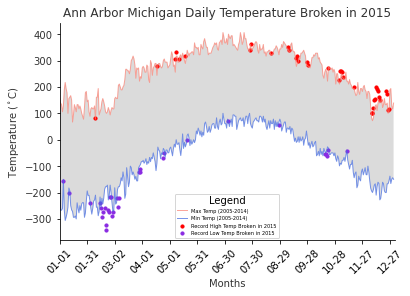

In [47]:
%matplotlib inline
plt.figure()

plt.plot(max05.values, label = 'Max Temp (2005-2014)', linewidth=1, alpha=0.7, c='salmon')
plt.plot(min05.values, label = 'Min Temp (2005-2014)', linewidth=1, alpha=0.7, c='royalblue')

plt.gca().fill_between(range(len(max05)), max05['Data_Value'], min05['Data_Value'], facecolor ='lightgray', alpha = 0.8)

plt.scatter(bmax, max_15.iloc[bmax], s=10, color='red', label = 'Record High Temp Broken in 2015')
plt.scatter(bmin, min_15.iloc[bmin], s=10, color='blueviolet', label = 'Record Low Temp Broken in 2015')

plt.legend(loc='best', title='Legend', fontsize=5)

plt.xticks(range(0, len(max05), 30), max05.index[range(0, len(max05), 30)], rotation=45)
plt.yticks(alpha=0.8)
plt.xlim(0,365)
plt.xlabel('Months', alpha=0.8)
plt.ylabel('Temperature ($^\circ$C)', alpha=0.8)
plt.title('Ann Arbor Michigan Daily Temperature Broken in 2015', alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(0.3)
plt.gca().spines['left'].set_visible(0.3)